# K-Nearest Neighbors (KNN)

## Intuition 
KNN is a non-parametric, instance-based algorithm, so there is no training phase in the usual sense.
To predict a new point: 
1. Compute distance to all training points 
2. Select the K closest neighbors 
3. Aggregate their labels
    - Classification → majority vote 
    - Regression → average 

---

## Euclidean distance (Most common distance metric)

$$
d(x, x^\prime) = \sqrt{\sum_{i=1}^{n}(x_i - x^\prime_i)^2}
$$

In [35]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [106]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate Data 
n_samples = 600
n_features = 2
n_informative = 2
n_redundant = 0
n_classes = 2 
n_clusters_per_class = 2
class_sep = 0.6
flip_y = 0.1
random_state = 0

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters_per_class,   
    class_sep=class_sep,            
    flip_y=flip_y,             
    random_state=random_state
)

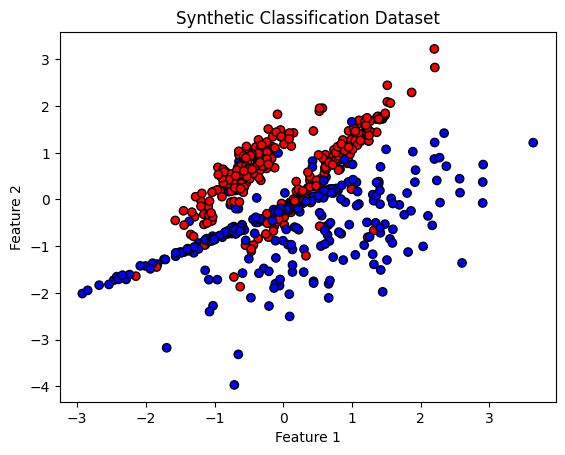

In [107]:
# Visualize Synthetic Dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Dataset")
plt.show()

In [108]:
from sklearn.model_selection import train_test_split

# Train/Test Split 
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

KNN Depends on distances, so it **needs** scaling

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN Model From Scratch 

In [110]:
class KNNClassifier:
    def __init__(self, k=3): 
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def _predict_single(self, x):
        # Compute distances 
        distances = [euclidean_distance(x, x_train) 
                    for x_train in self.X_train]
        
        # Get indices of K closest neighbors 
        k_indices = np.argsort(distances)[:self.k]
        
        # Get labels of K closest neighbors 
        k_labels = self.y_train[k_indices]
        
        # Classification → majority vote
        values, counts = np.unique(k_labels, return_counts=True)
        return values[np.argmax(counts)]
    
    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

In [111]:
from sklearn.metrics import accuracy_score

knn_model_scratch = KNNClassifier(k=5)
# Fit
knn_model_scratch.fit(X_train, y_train)
# Predict
y_pred_scratch = knn_model_scratch.predict(X_test)
# Evaluate
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

print("Accuracy:", accuracy_scratch)

Accuracy: 0.85


In [112]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
    plt.show()


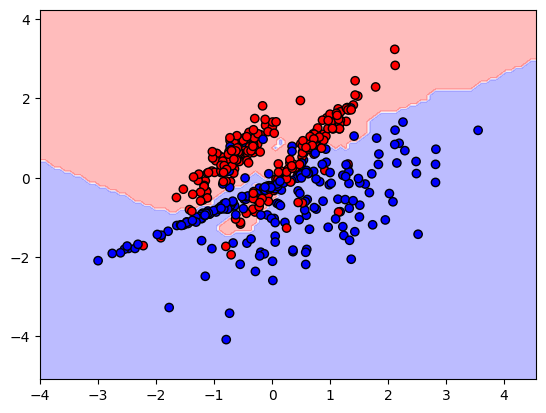

In [113]:
# Visualize Decision Boundary (from scratch model)
plot_decision_boundary(X_train, y_train, knn_model_scratch)

### KNN Model from scikit-learn

In [114]:
from sklearn.neighbors import KNeighborsClassifier

# Fit
knn_model_sk = KNeighborsClassifier(n_neighbors=5)
knn_model_sk.fit(X_train, y_train);

# Predict
y_pred_sk = knn_model_sk.predict(X_test)
accuracy_sk = accuracy_score(y_test, y_pred_sk)

print("Accuracy:", accuracy_sk)

Accuracy: 0.85


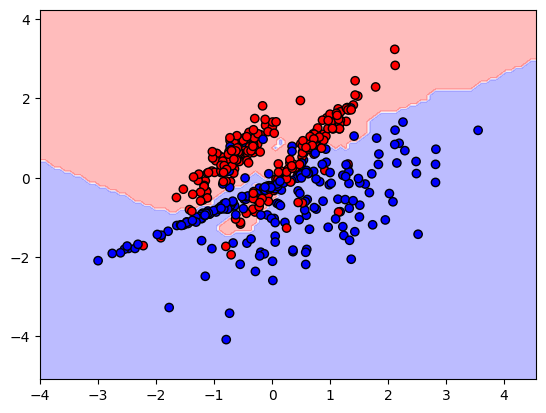

In [115]:
# Visualize Decision Boundary (scikit-learn model)
plot_decision_boundary(X_train, y_train, knn_model_sk)

Let's analyze the effect of K on model performance

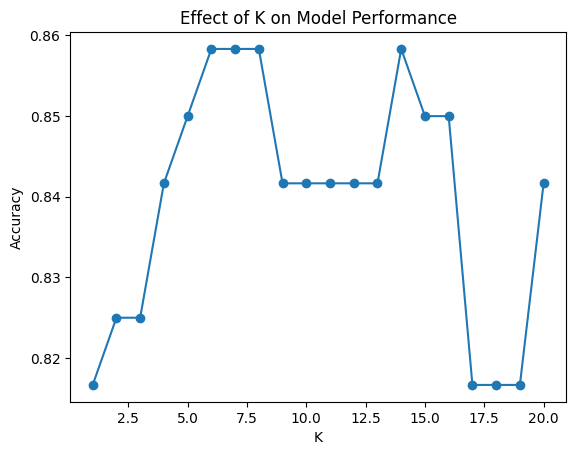

In [121]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Effect of K on Model Performance")
plt.show()